# 3. Regression

In [1]:
# Import Libraries
import pandas as pd
import requests
import gdown
import pyarrow
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
all_data_for_regression = pd.read_parquet('all_data_for_regression.parquet')

## 3.1 Logistic Regression

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
target_column = 'event'

# delete timestamp column
if 'timestamp' in all_data_for_regression.columns:
    all_data_for_regression = all_data_for_regression.drop('timestamp', axis=1)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(all_data_for_regression.drop(target_column, axis=1), all_data_for_regression[target_column], test_size=0.2, random_state=42)

# scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# logistic regression
logreg = LogisticRegression() 
logreg.fit(X_train_scaled, y_train)

# evaluate model
predictions = logreg.predict(X_test_scaled)
probabilities = logreg.predict_proba(X_test_scaled)[:, 1]  
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = np.mean(np.abs(predictions - y_test))

print(f"MSE: {mse}")
print(f"R^2: {r2}")
print(f"MAE: {mae}")
print(f"RMSE: {np.sqrt(mse)}")


MSE: 0.0822129859837989
R^2: 0.6259080104361235
MAE: 0.0822129859837989
RMSE: 0.2867280697521589


Using the Logistic Regression model, we will predict the probability of event is 1 or 0 (onset or wakeup).

The result of Logistic Regression is not too bad. The MSE is 0.08 and R^2 is 0.63 (which is higher than 0.6).

And I think our dataset is suitable for Logistic Regression because the event colomn value is binary.


Visualization

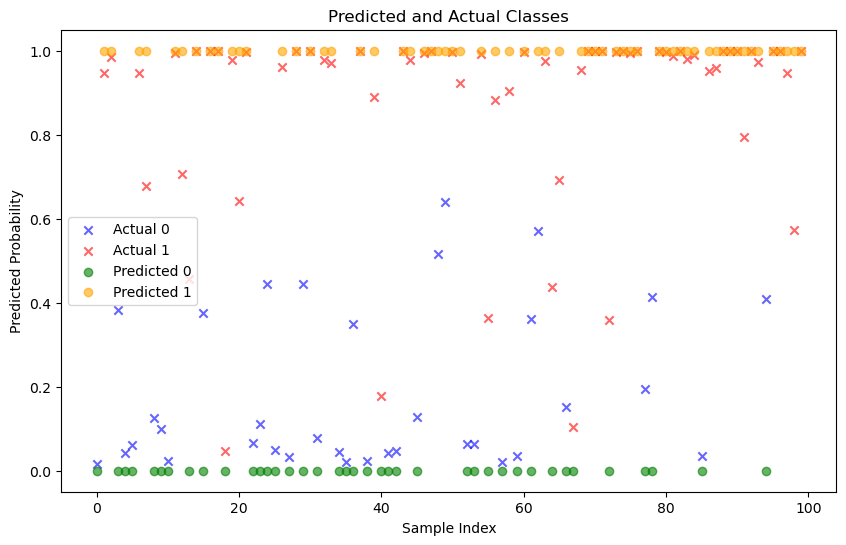

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# only choose first 100 samples
num_samples = 100

plt.scatter(np.arange(num_samples)[y_test.iloc[:num_samples] == 0], probabilities[:num_samples][y_test.iloc[:num_samples] == 0], color='blue', label='Actual 0', alpha=0.6,marker='x')
plt.scatter(np.arange(num_samples)[y_test.iloc[:num_samples] == 1], probabilities[:num_samples][y_test.iloc[:num_samples] == 1], color='red', label='Actual 1', alpha=0.6,marker='x')

plt.scatter(np.arange(num_samples)[predictions[:num_samples] == 0], np.zeros(sum(predictions[:num_samples] == 0)), color='green', label='Predicted 0', alpha=0.6)
plt.scatter(np.arange(num_samples)[predictions[:num_samples] == 1], np.ones(sum(predictions[:num_samples] == 1)), color='orange', label='Predicted 1', alpha=0.6)

plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('Predicted and Actual Classes')
plt.legend()
plt.show()


This figure is the visualization of Logistic Regression. 

This scatterplot shows the predicted probability, actual category, and predicted category for the first 100 samples. The blue and red "x" shaped dots indicate the predicted probability of samples with actual categories of 0 and 1, respectively, while the green and orange dots indicate samples predicted by the model to be 0 and 1, respectively.


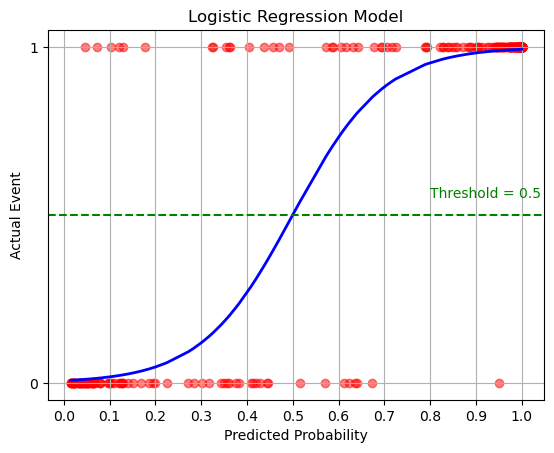

In [7]:
def sigmoid(x, a=1, b=0):
    return 1 / (1 + np.exp(-a * (x - b)))


# only choose 300 samples
num_samples = 300
probabilities_sampled = probabilities[:num_samples]
y_test_sampled = y_test.iloc[:num_samples]

# sort by predicted probabilities
sorted_indices = np.argsort(probabilities_sampled)
sorted_probabilities = probabilities_sampled[sorted_indices]
sorted_y_test = y_test_sampled.iloc[sorted_indices]

smooth_y_test = sigmoid(sorted_probabilities, a=10, b=0.5) 


plt.plot(sorted_probabilities, smooth_y_test, color='blue', linestyle='-', linewidth=2)
plt.scatter(sorted_probabilities, sorted_y_test, color='red', marker='o', alpha=0.5)  

threshold = 0.5
plt.axhline(y=threshold, color='green', linestyle='--')
plt.text(0.8, threshold + 0.05, f'Threshold = {threshold}', color='green')

plt.xlabel('Predicted Probability')
plt.ylabel('Actual Event')
plt.title('Logistic Regression Model')
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks([0, 1])
plt.grid(True)
plt.show()


This figure is the visualization of Logistic Regression.

By using Sigmoid function to smooth the curve, we can see the x-axis is the predicted probability of 300 samples and y-axis is their actual event(0 or 1). 

And when the actual event ==0.5 (which means the threshold is 0.5), the predicted probability is 0.5. So it fits the Logistic Regression model.

## 3.2 Ridge Regression

In [5]:
# 1. randomly split the data
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

target_column = 'event'

# from all_data_for_regression, drop the target column and split the data into training and testing sets

# drop timestamp column
if 'timestamp' in all_data_for_regression.columns:
    all_data_for_regression = all_data_for_regression.drop('timestamp', axis=1)
X_train, X_test, y_train, y_test = train_test_split(all_data_for_regression.drop(target_column, axis=1), all_data_for_regression[target_column], test_size=0.2, random_state=42)

# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ridge regression
ridge = Ridge(alpha=10.0) 
ridge.fit(X_train_scaled, y_train)

# evaluate the model
predictions = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = np.mean(np.abs(predictions - y_test))

print(f"MSE: {mse}")
print(f"R^2: {r2}")
print(f"MAE: {mae}")
print(f"RMSE: {np.sqrt(mse)}")

MSE: 0.08940824883507144
R^2: 0.5931675599676535
MAE: 0.22834422969188864
RMSE: 0.2990121215520726


In [6]:
# 2. split the data by series_id
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

target_column = 'event'

# drop timestamp column
if 'timestamp' in all_data_for_regression.columns:
    all_data_for_regression = all_data_for_regression.drop('timestamp', axis=1)


# randomly choose 33 series_id as training set
train_series_ids = all_data_for_regression['series_id'].drop_duplicates().sample(33, random_state=42)

# split the data into training and testing sets
train_data = all_data_for_regression[all_data_for_regression['series_id'].isin(train_series_ids)]
test_data = all_data_for_regression[~all_data_for_regression['series_id'].isin(train_series_ids)]

# split the data into X and y
X_train = train_data.drop(target_column, axis=1)
y_train = train_data[target_column]
X_test = test_data.drop(target_column, axis=1)
y_test = test_data[target_column]

# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ridge regression
ridge = Ridge(alpha=10.0) 
ridge.fit(X_train_scaled, y_train)

# evaluate the model
predictions = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = np.mean(np.abs(predictions - y_test))

print(f"MSE: {mse}")
print(f"R^2: {r2}")
print(f"MAE: {mae}")
print(f"RMSE: {np.sqrt(mse)}")

MSE: 0.11043003429083202
R^2: 0.40261195746746226
MAE: 0.24507916617595302
RMSE: 0.3323101477397764


Two segmentation approaches, the second one gives worse results than the first one

Can improve the value of R^2 in Ridge regression

## 3.3 Cross Validation

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# ridge regression
ridge = Ridge()

param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')

grid_search.fit(X_train_scaled, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best R² score: ", grid_search.best_score_)


Best parameters:  {'alpha': 0.1}
Best R² score:  0.5966714738821313


By using cross validation, we can get a more accurate value of R^2 when alpha value is 0.1

# 4. Discriminant Analysis

## 4.1 LDA (linear discriminant analysis)

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

target_column = 'event'

# drop timestamp column
if 'timestamp' in all_data_for_regression.columns:
    all_data_for_regression = all_data_for_regression.drop('timestamp', axis=1)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_data_for_regression.drop(target_column, axis=1), all_data_for_regression[target_column], test_size=0.2, random_state=42)

# LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# make predictions
y_pred = lda.predict(X_test)
print(y_pred)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[0. 1. 1. ... 1. 0. 0.]
Accuracy: 0.9011419032231961


the accuracy of LDA is 0.90, which is better than logistic regression

Visualization

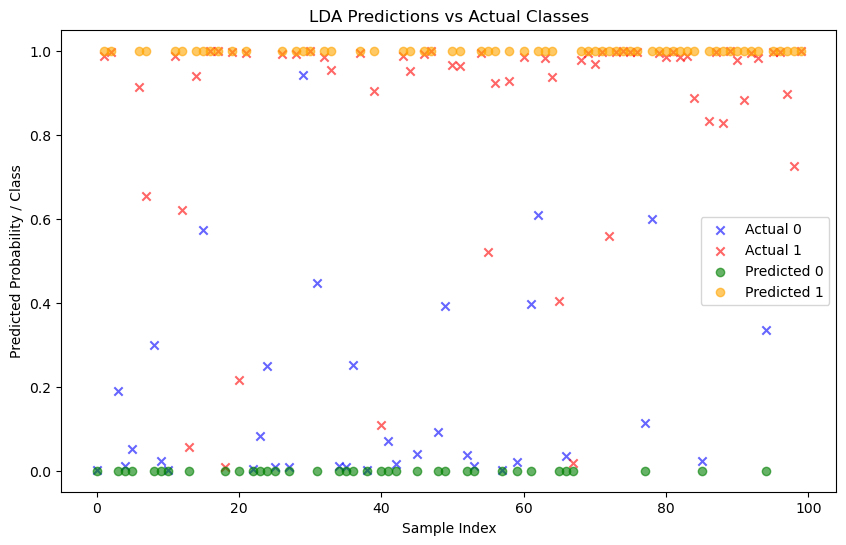

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

y_prob = lda.predict_proba(X_test)[:, 1]  

df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability': y_prob
})

df_sampled = df.head(100).reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.scatter(np.arange(100)[df_sampled['Actual'] == 0], df_sampled['Probability'][df_sampled['Actual'] == 0], color='blue', label='Actual 0', alpha=0.6, marker='x')
plt.scatter(np.arange(100)[df_sampled['Actual'] == 1], df_sampled['Probability'][df_sampled['Actual'] == 1], color='red', label='Actual 1', alpha=0.6, marker='x')
plt.scatter(np.arange(100)[df_sampled['Predicted'] == 0], np.zeros(sum(df_sampled['Predicted'] == 0)), color='green', label='Predicted 0', alpha=0.6)
plt.scatter(np.arange(100)[df_sampled['Predicted'] == 1], np.ones(sum(df_sampled['Predicted'] == 1)), color='orange', label='Predicted 1', alpha=0.6)

plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability / Class')
plt.title('LDA Predictions vs Actual Classes')
plt.legend()
plt.show()

This figure shows the predictions of the Linear Discriminant Analysis model on 100 samples compared to the real classes. The blue and red dots represent samples with true categories of 0 and 1, respectively, and their positions are positioned according to the predicted probabilities for each sample. Alternatively, the green and orange points represent the predicted category (0 or 1) of the LDA model for each sample. These points are arranged along the horizontal lines (0 and 1) to visualize the agreement and deviation between the model predictions and the actual categories. This plot allows us to visualize how the model performs on specific samples, identifying which samples the model predicts more accurately and which samples may be misclassified.


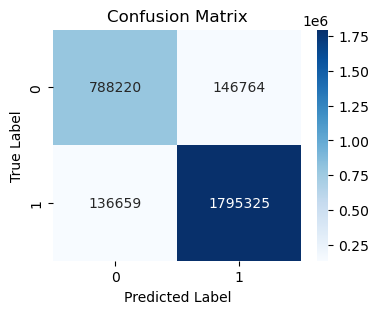

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The confusion matrix is a table that describes the predictive accuracy of a classification model on test data. The rows of the matrix represent the actual categories, while the columns represent the model's predicted categories. 

In this confusion matrix:

The top left cell (True Negative, True Negative) shows that the number of samples correctly predicted by the model as category 0 is 788220.

The cell in the upper right corner (False Positive, False Positive) shows that the number of samples that the model incorrectly predicted as category 1 but were actually category 0 was 146764.

The cell in the lower left corner (False Negative, False Negative) shows that the number of samples that the model incorrectly predicted as category 0 but were actually category 1 was 136659.

The cell in the lower right corner (True Positive) shows that the number of samples that the model correctly predicts as category 1 is 1795325.



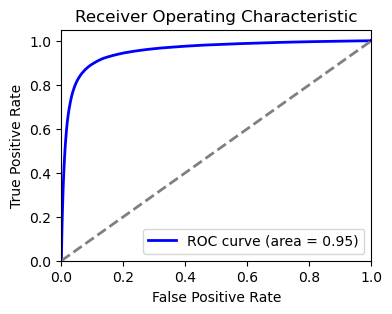

In [21]:

from sklearn.metrics import roc_curve, auc

# 计calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lda.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC curve shows how the model performs under all possible classification thresholds by comparing the True Positive Rate (TPR) to the False Positive Rate (FPR). 

The blue line in the figure represents the ROC curve of the model, while the gray dashed line represents the baseline for random guessing. 

Ideally, the ROC curve would be as close to the upper left corner as possible, indicating a high True Positive Rate and a low False Positive Rate, whereas the area under the ROC curve (AUC) in this figure is 0.95, indicating that the model has a high ability to distinguish between the two categories.

## 4.2 QDA (quadric discriminant analysis)

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

target_column = 'event'

# delete timestamp column
if 'timestamp' in all_data_for_regression.columns:
    all_data_for_regression = all_data_for_regression.drop('timestamp', axis=1)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_data_for_regression.drop(target_column, axis=1), all_data_for_regression[target_column], test_size=0.2, random_state=42)

# QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# prediction
y_pred = qda.predict(X_test)
print(y_pred)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[0. 1. 1. ... 1. 0. 0.]
Accuracy: 0.8877179654603748


the accuracy of QDA is 0.89, which is worse than LDA, but better than logistic regression